## Waste Management Using CNN Model

In [5]:
# install libraries
!pip install opencv-python pandas matplotlib tqdm plotly nbformat

In [6]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [7]:
# setting path
train_path = "Dataset/TRAIN"
test_path = "Dataset/TEST"

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [9]:
# visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [01:25<00:00, 116.78it/s]


In [10]:
data.shape


(22564, 2)

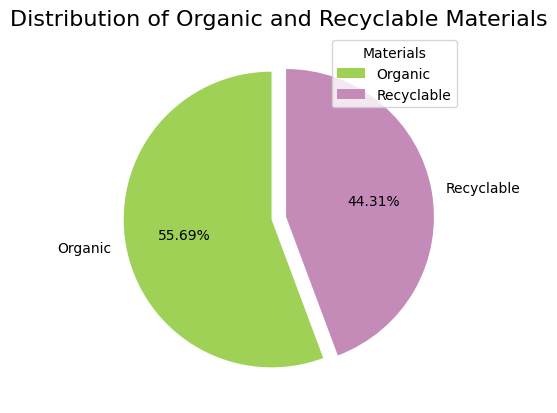

In [14]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'], autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.05,0.05])
# Add title
plt.title('Distribution of Organic and Recyclable Materials', fontsize=16)

# Add legend
plt.legend(['Organic', 'Recyclable'], title="Materials", loc='upper right')

# Show the plot
plt.show()

In [12]:
# Create a DataFrame for the pie chart
label_counts = data['label'].value_counts().reset_index()
label_counts.columns = ['Materials', 'Count']

# Map the original labels to the desired names
label_counts['Materials'] = label_counts['Materials'].replace({
    'TRAIN\O': 'Organic',
    'TRAIN\R': 'Recyclable'
})

# Create an interactive pie chart using Plotly
fig = px.pie(label_counts, values='Count', names='Materials', title='Distribution of Organic and Recyclable Materials',
             color_discrete_sequence=colors)

# Customize the pie chart (optional)
fig.update_traces(marker=dict(line=dict(color='white', width=2)), hoverinfo='label+percent')

# Show the plot
fig.show()